<a href="https://colab.research.google.com/github/rajdeepbanerjee-git/JNCLectures_Intro_to_ML/blob/main/Week7/Lec7_K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

from numpy.linalg import norm

In [ ]:
iris = datasets.load_iris()
X = iris["data"]
X

In [ ]:
def calc_centroid(vector):
  centroid = np.sum(vector, axis = 0)/len(vector)
  return centroid

In [ ]:
# initialize cluster ids and epochs
K = 2
epochs = 20
init_cluster_id = np.random.randint(1,K+1,len(X))
cluster_evolution = [init_cluster_id]


for epoch in range(epochs):
  distances = []
  centroids = []
  for cluster in range(1, K+1):
    # get cluster labels
    temp_cluster_id = np.where(init_cluster_id == cluster)

    # calculate centroid
    temp_centroid = calc_centroid(vector = X[temp_cluster_id])
    centroids.append(temp_centroid)

    # calculate distance for all data points from centroid
    temp_distances = norm((X - temp_centroid), axis =  1)
    distances.append(temp_distances)

  # revise cluster label comparing the distances of each data point from all centroids
  revised_cluster_ids = np.argmin(np.stack(distances), axis = 0) + 1
  cluster_evolution.append(revised_cluster_ids)
  init_cluster_id = revised_cluster_ids

  # stop when the clusters don't change in two consecutive iterations
  if all(cluster_evolution[epoch - 1] == cluster_evolution[epoch]):
    print(f"converged at epoch: {epoch}")
    last_epoch = epoch
    break




converged at epoch: 4


In [ ]:
def get_plot_iteration(iter, K = 3):
  scatter_x = X[:, 1]
  scatter_y = X[:, 2]
  K = [i+1 for i in range(K)]
  cdict = {1: 'red', 2: 'blue', 3: 'green'}

  fig, ax = plt.subplots()
  for k in K:
      ix = np.where(cluster_evolution[iter] == k)
      ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[k], label = k)
  ax.legend()
  plt.show()

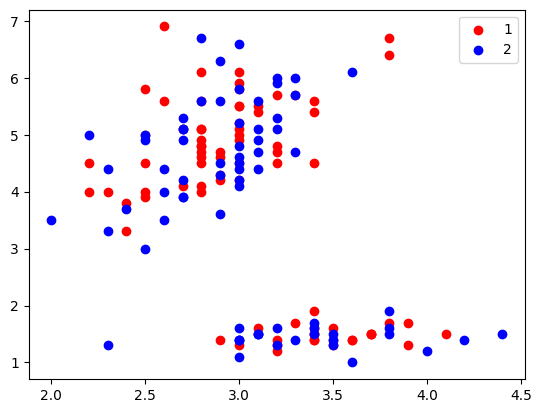

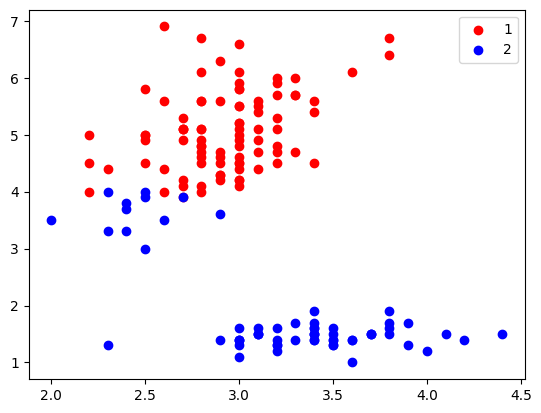

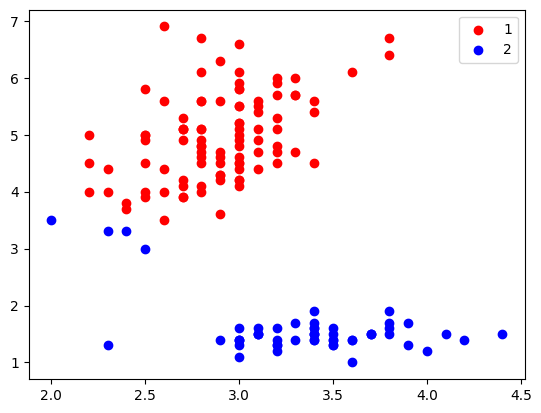

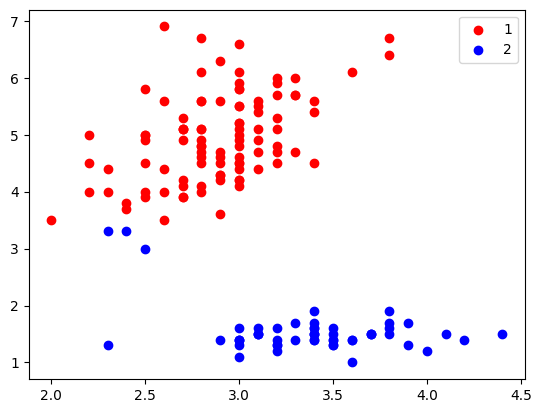

In [ ]:
for i in range(last_epoch):
  get_plot_iteration(iter = i, K = 2)

#### Assignment: Calculate silhoutte score and the optimal number of clusters using the elbow method.